# Day 1
## MLP
* Build intuition by coding an MLP without frameworks. 
* Lock in tensor shapes and loss definitions. 

### Task
1. Implement a 2-layer MLP (D -> H -> C) with ReLU and softmax (NumPy)
2. Write cross_entropy and softmax logits (stable version: shift by max)
3. Ad L2 regularization to the loss. 

**Checks**
* Unit test: feed a tiny batch with hand-computed outputs
* Verify that loss decreases with a single manual gradient step
* Derive backprop.

In [ ]:
from nets.mlp import MLP
import numpy as np

mlp = MLP(D=2, H=10, C=2, seed=42)
X = np.array([[1,0], [0,1], [1,1], [0,0]])
y = np.array([[1,0], [1,0], [0,1], [0,1]])

L2 = 0.0
LR = 0.5

losses = []
for _ in range(200):
    loss = mlp.loss(X,y,l2=L2)
    losses.append(loss)
    mlp.sgd_step(X,y, lr=LR, l2=L2)

In [18]:
mlp.predict_proba(X)

array([[0.98849299, 0.01150701],
       [0.99214326, 0.00785674],
       [0.0028644 , 0.9971356 ],
       [0.00999406, 0.99000594]])

### SGD loss

- Finite difference check backprop
- log-sum-exp trick (review)
- Learn Rate finder - picks the largest LR before loss spikes, then train with +/- 1/3 of that and add decay.
- Early flattening of the learning curve - L2 too high or a capacity issue.
- No oscillation in the learning curve - LR isn't too high
- Keeps falling past 0.1 -> not capacity limited. 

Text(0, 0.5, 'Loss')

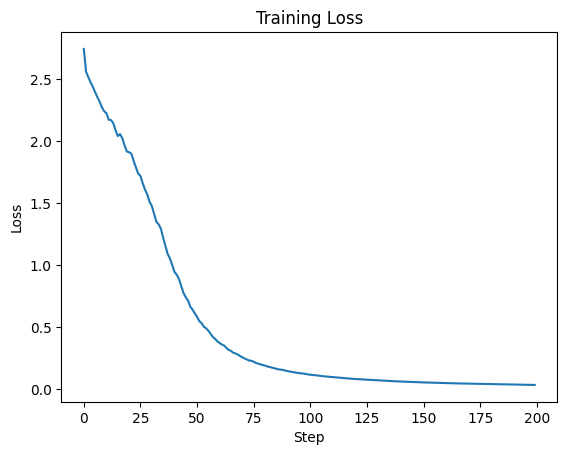

In [19]:
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Step")
plt.ylabel("Loss")